# Natural Computing Assignment: Ensemble Learning
## Group 7

In [320]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import re

In [321]:
df = pd.read_csv('aug_train.csv')[['city_development_index', 'gender', 'major_discipline', 'experience', 'company_size', 'company_type', 'training_hours', 'target']]

In [322]:
df

,city_development_index,gender,major_discipline,experience,company_size,company_type,training_hours,target
0,0.920,Male,STEM,>20,NaN,NaN,36,1.0
1,0.776,Male,STEM,15,50-99,Pvt Ltd,47,0.0
2,0.624,NaN,STEM,5,NaN,NaN,83,0.0
3,0.789,NaN,Business Degree,<1,NaN,Pvt Ltd,52,1.0
4,0.767,Male,STEM,>20,50-99,Funded Startup,8,0.0
...,...,...,...,...,...,...,...,...
19153,0.878,Male,Humanities,14,NaN,NaN,42,1.0
19154,0.920,Male,STEM,14,NaN,NaN,52,1.0
19155,0.920,Male,STEM,>20,50-99,Pvt Ltd,44,0.0
19156,0.802,Male,NaN,<1,500-999,Pvt Ltd,97,0.0


In [323]:
df = df.dropna()

In [324]:
df['gender'] = pd.factorize(df['gender'])[0]
df['major_discipline'] = pd.factorize(df['major_discipline'])[0]
df['experience'] = [20 if elem == ">20" else elem for elem in df['experience']]
df['experience'] = [0 if elem == "<1" else int(elem) for elem in df['experience']]
df['company_size'] = [str(re.sub('[^0-9]+', '', re.split('-|/|<|>', elem)[-1])) for elem in df['company_size']]
df['company_type'] = pd.factorize(df['company_type'])[0]

(array([0, 0, 0, ..., 1, 1, 0], dtype=int64), Index(['Male', 'Female', 'Other'], dtype='object'))


<ipython-input-324-599357c73040>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = pd.factorize(df['gender'])[0]
<ipython-input-324-599357c73040>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['major_discipline'] = pd.factorize(df['major_discipline'])[0]
<ipython-input-324-599357c73040>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [325]:
df

,city_development_index,gender,major_discipline,experience,company_size,company_type,training_hours,target
1,0.776,0,0,15,99,0,47,0.0
4,0.767,0,0,20,99,1,8,0.0
7,0.762,0,0,13,10,0,18,1.0
8,0.920,0,0,7,99,0,46,1.0
11,0.920,0,0,5,9999,0,108,0.0
...,...,...,...,...,...,...,...,...
19147,0.624,0,0,1,500,0,52,1.0
19149,0.920,0,0,9,99,0,36,1.0
19150,0.920,1,0,10,500,3,23,0.0
19152,0.920,1,1,7,49,1,25,0.0


In [326]:
features = df[['city_development_index', 'gender', 'major_discipline', 'experience', 'company_size', 'company_type', 'training_hours']]
labels = df['target']

In [327]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [331]:
scores = []
for i, n in enumerate(range(1, 202, 5)):
    print(f'{i+1}/{len(range(1, 202, 5))}', end = '\r')
    rf = RandomForestClassifier(n_estimators = n, class_weight='balanced', max_depth = 10, n_jobs = 4, random_state = 42) # max_depth = 5, n_jobs = 4, class_weight='balanced_subsample', 
    rf.fit(train_features, train_labels);
    scores.append(f1_score(list(test_labels), rf.predict(test_features)))
    

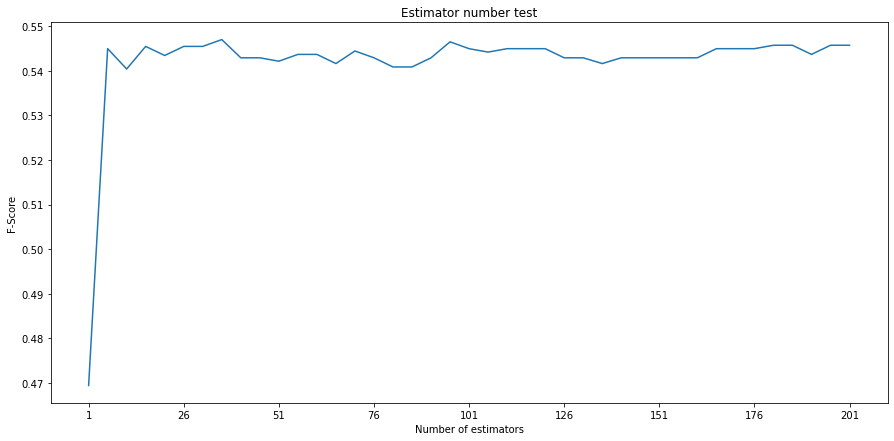

In [332]:

plt.figure(figsize=(15, 7))
plt.title("Estimator number test")
plt.xlabel("Number of estimators")
plt.xticks(np.arange(0, len(np.arange(1, 202, 5)), 5), np.arange(1, 202, 25))
plt.ylabel("F-Score")
plt.plot(scores)
plt.savefig("estimators", bbox_inches='tight')
plt.show()

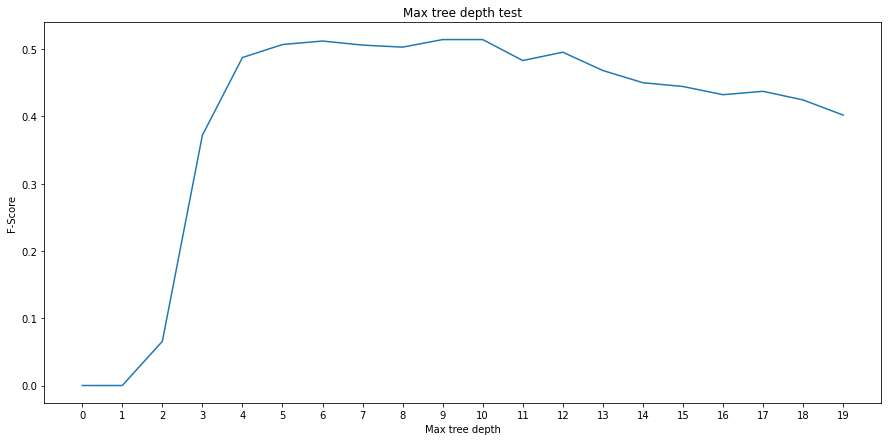

In [330]:
scores = []
for i, n in enumerate(range(1, 21, 1)):
    print(f'{i+1}/{len(range(1, 21, 1))}', end = '\r')
    rf = RandomForestClassifier(n_estimators = 100, max_depth = n, n_jobs = 4, random_state = 42) # max_depth = 5, n_jobs = 4, class_weight='balanced_subsample', 
    rf.fit(train_features, train_labels);
    scores.append(f1_score(list(test_labels), rf.predict(test_features)))
    
plt.figure(figsize=(15, 7))
plt.title("Max tree depth test")
plt.xlabel("Max tree depth")
plt.xticks(np.arange(0, 21), np.arange(0, 21))
plt.ylabel("F-Score")
plt.plot(scores)
plt.savefig("depth", bbox_inches='tight')
plt.show()

In [335]:
scores = []

In [338]:
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced_subsample', max_depth = 10, n_jobs = 4, random_state = 42) # max_depth = 5, n_jobs = 4, class_weight='balanced_subsample', 
rf.fit(train_features, train_labels);
scores.append(f1_score(list(test_labels), rf.predict(test_features)))

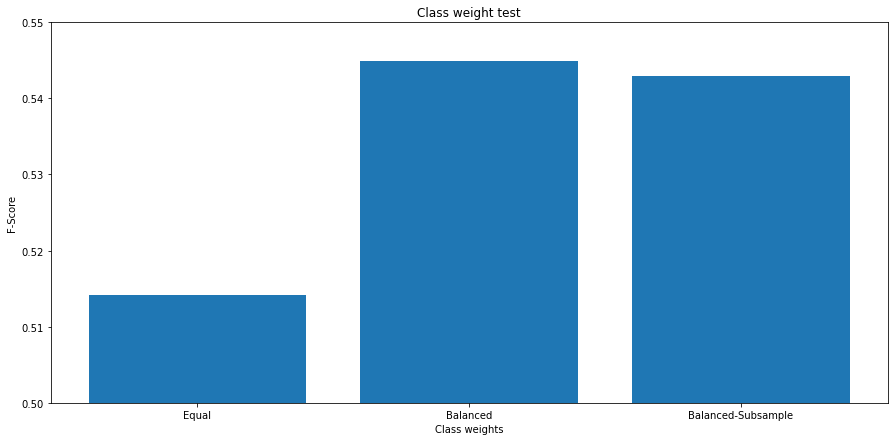

In [339]:
plt.figure(figsize=(15, 7))
plt.title("Class weight test")
plt.xlabel("Class weights")
plt.xticks([0, 1, 2], ["Equal", "Balanced", "Balanced-Subsample"])
plt.ylabel("F-Score")
plt.bar([0, 1, 2], scores)
plt.ylim(0.5, 0.550)
plt.savefig("weights", bbox_inches='tight')
plt.show()

In [344]:
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', max_depth = 10, n_jobs = 4, random_state = 42) # max_depth = 5, n_jobs = 4, class_weight='balanced_subsample', 
rf.fit(train_features, train_labels);

predictions = rf.predict(test_features)
acc = f1_score(list(test_labels), predictions)

print(acc)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, predictions))

0.5449438202247191
[[1742  146]
 [ 178  194]]
